In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

# Making a Histogram

In [5]:
#Two hundred top grossing movies of all times
top_movies = Table.read_table("top_movies_2017.csv")
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [9]:
#Lets create a column where we have the ages of the movies. So we will take 2022 and subtract the year to get the age
age = 2022 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', age)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,83
Star Wars,Fox,460998007,1583483200,1977,45
The Sound of Music,Fox,158671368,1266072700,1965,57
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,40
Titanic,Paramount,658672302,1204368000,1997,25
The Ten Commandments,Paramount,65500000,1164590000,1956,66
Jaws,Universal,260000000,1138620700,1975,47
Doctor Zhivago,MGM,111721910,1103564200,1965,57
The Exorcist,Warner Brothers,232906145,983226600,1973,49
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,85


In [10]:
min(age),max(age)

(5, 101)

In [11]:
#Let me start of by choosing my bins, an array of left end points
my_bins = make_array(0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110)

In [12]:
top_movies.bin('Age', bins = my_bins)

bin,Age count
0,25
10,36
20,36
30,26
40,28
50,21
60,16
70,5
80,6
90,0


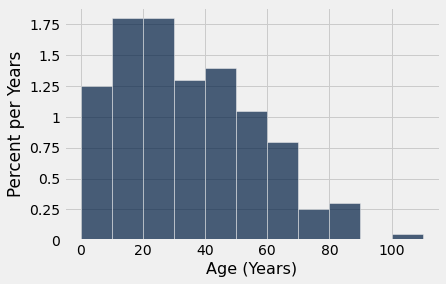

In [13]:
top_movies.hist('Age', bins = my_bins, unit = 'Years')

# Functions

In [15]:
def double(x):
    return x**2

In [16]:
double(3.142)

9.872164

In [17]:
3.142*3.142

9.872164

In [18]:
stat = 215
double(stat)

46225

In [19]:
double(abs(-215))

46225

In [20]:
def percent(x,y):
    return (x/y)*100

In [21]:
percent(5,10)

50.0

In [26]:
#Define function that has input array and the return the percent
def percent_array(array_x):
    return np.round(array_x / sum(array_x) * 100, 2)

In [29]:
trial_array = make_array(10,15,25)
percent_array(trial_array)

array([20., 30., 50.])

In [30]:
top_movies.with_column('Contribution',top_movies.apply(percent_array,3))

TypeError: 'numpy.int64' object is not iterable

# Galton

In [33]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [39]:
heights = Table().with_columns('Midparent',galton.column('midparentHeight'),
                              'Child', galton.column('childHeight'))
heights

Midparent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


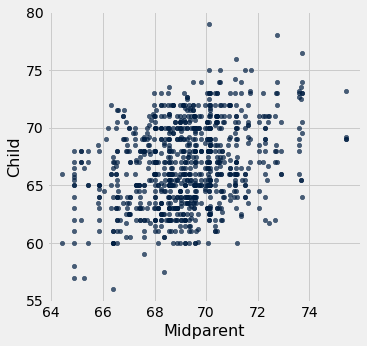

In [43]:
heights.scatter(0,1)

In [46]:
around68=heights.where('Midparent',are.between(67,69))
around68

Midparent,Child
68.94,65.7
68.98,71
68.98,70
68.98,64.5
68.98,62.5
68.98,61.5
68.98,72
68.98,70.5
68.98,70.5
68.98,64.5


In [47]:
around68.column('Child').mean()

66.0611842105263

In [52]:
#lets define a function for any midparent height(mpht)

def predict_childheight(mpht):
    around = heights.where('Midparent',are.between(mpht - 1, mpht + 1) )
    return around.column('Child').mean()

In [53]:
predict_childheight(68)

66.0611842105263

In [58]:
#create a table with all predicted child heights
predicted_heights=heights.with_columns('Predicted',heights.apply(predict_childheight,'Midparent'))
predicted_heights

Midparent,Child,Predicted
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,69.9971
73.66,72.5,69.9971
73.66,65.5,69.9971
73.66,65.5,69.9971
72.06,71,68.2092
72.06,68,68.2092


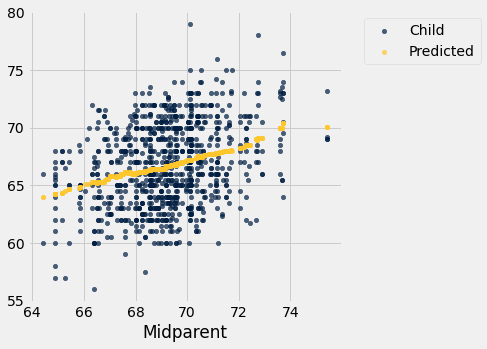

In [59]:
predicted_heights.scatter('Midparent')